In [21]:
# 필요한 라이브러리 import 해주기
import cv2
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_datasets as tfds
import numpy


In [22]:
# train 과 info split 해주기
data_train, ds_info = tfds.load("cats_vs_dogs", split=[tfds.Split.TRAIN], with_info=True)
ds_info

tfds.core.DatasetInfo(
    name='cats_vs_dogs',
    full_name='cats_vs_dogs/4.0.0',
    description="""
    A large set of images of cats and dogs. There are 1738 corrupted images that are dropped.
    """,
    homepage='https://www.microsoft.com/en-us/download/details.aspx?id=54765',
    data_path='/Users/bagtaeyun/tensorflow_datasets/cats_vs_dogs/4.0.0',
    download_size=786.68 MiB,
    dataset_size=689.64 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'image/filename': Text(shape=(), dtype=tf.string),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=23262, num_shards=8>,
    },
    citation="""@Inproceedings (Conference){asirra-a-captcha-that-exploits-interest-aligned-manual-image-categorization,
    author = {Elson, Jeremy and Douceur, John (JD) and Howell, Jon and Saul, Jare

In [24]:
# 30개만 이미지 가져오기
images = [one['image'].numpy() for one in data_train[0].take(30)]
len(images)

30

(-0.5, 499.5, 359.5, -0.5)

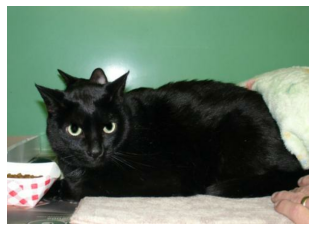

In [10]:
# 이미지 출력하기 
plt.imshow(images[11])
plt.axis("off")

In [26]:
# resnet 가중치 가져오기
resnet50_pre = tf.keras.applications.resnet.ResNet50(weights='imagenet', input_shape=(224, 224, 3))
resnet50_pre.summary()


Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [27]:
from tensorflow.keras.applications.imagenet_utils import decode_predictions

In [28]:
#이미지와 퍼센테이지, 순위 출력하기
def pred_img(img):
    plt.imshow(img)
    plt.axis("off")
    plt.show()
    
    img_resized = cv2.resize(img, (224, 224))
    pred = resnet50_pre.predict(img_resized.reshape([1, 224, 224, 3]))
    decode_pred = decode_predictions(pred)
    
    for i, instance in enumerate(decode_pred[0]):
        print("{}위: {}({:.2f}%) ". format(i+1, instance[1], instance[2] * 100))
        

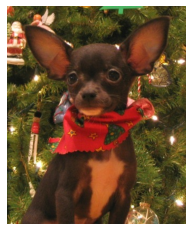

1위: Chihuahua(90.09%) 
2위: miniature_pinscher(4.65%) 
3위: French_bulldog(2.58%) 
4위: Boston_bull(0.80%) 
5위: boxer(0.45%) 


In [18]:
pred_img(images[1])

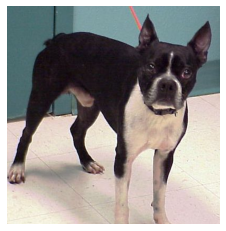

1위: Boston_bull(97.16%) 
2위: Chihuahua(1.27%) 
3위: French_bulldog(0.49%) 
4위: kelpie(0.42%) 
5위: miniature_pinscher(0.28%) 


In [20]:
pred_img(images[13])